# Notebook to analyze Scielo Data

In [1]:
# Boring but neccesary imports
%matplotlib inline
import matplotlib.pyplot as plt
import ingest_data 

## Ingest the data into a data frame using the library

In [2]:
df = ingest_data.ingest_wos_scielo_folder()
print('Number of records ingested: ',len(df))

Encoding:  UTF-8-SIG
Number of records ingested:  15483


## Now unpack the data frame into dictionaries (authors, papers, institutions)
The output corresponds to fields with insufficient information to extract a country.
(tdl)This probably should go to a log file.

In [3]:
authors, papers, institutions = ingest_data.get_scielo_dicts(df)

Universidade Federal do Paraná not in datbase
Rashtrasant Tukadoji Maharaj Nagpur University not in datbase
LMC College of Pharmacy not in datbase
Universidad de Jaén not in datbase
Fundación Andaluza para la Integración Social del Enfermo Mental (FAISEM) not in datbase
Home Dialysis Center not in datbase
Mutua Accidentes de Canarias not in datbase
Ministerio de Salud Pública de Posadas-Misiones not in datbase
Escolas de Mafra not in datbase
Secretaria Municipal de Saúde not in datbase
Universidad del Valle not in datbase
Asociación Española not in datbase
Istituto di Ricerca Sociale GPF not in datbase
Universidade de Brasília not in datbase
Faculdades Nordeste not in datbase
Prefeitura Municipal de Natal not in datbase
Centro Universitário Unirg not in datbase
UNICAMP not in datbase
Centro de Hemodiálisis Baxter-RTS not in datbase
Universidad Nacional de Educación Abierta y a Distancia (UNAD) not in datbase
Instituto de Investigaciones Químicas not in datbase
Instituto de Investigacio

UBC not in datbase
EMEF Antônio Carlos de Andrada e Silva not in datbase
La granja: programa ambulatorio para el tratamiento contra el consumo de drogas not in datbase
Escola Superior de Enfermagem do Porto not in datbase
Centro Hospitalar Médio Ave not in datbase
UFSM; Progepec Consultores Associados Ltda not in datbase
Universidade do Estado do Rio Grande do Norte not in datbase
EAFPJK not in datbase
Policlínico Guillermo González not in datbase
Méxic not in datbase
Hospital Universitário 'Dr. Domingos Leonardo Cerávolo' not in datbase
Fundação de Ciências Aplicadas not in datbase
Universidade do Estado do Rio de Janeiro not in datbase
Universidad Nacional de Tucumán not in datbase
Associação Fundo de Incentivo à Psicofarmacologia not in datbase
Fefisa not in datbase
Author for correspondence not in datbase
UFBA not in datbase
University of Queensland not in datbase
Fleury - Centro de Medicina Diagnóstica not in datbase
Coordenadoria de Assistência Técnica Integral not in datbase
Ins

Centro de Estudios Sociosanitarios not in datbase
Colegio Nuestra Señora del Rosario not in datbase
Comunidad de Madrid not in datbase
Universidad de Castilla- La Mancha not in datbase
BR not in datbase
UBA not in datbase
Universidad del Desarrollo not in datbase
Universidad del País Vasco UPV/EHU not in datbase
Universidad de La Rioja not in datbase
Universidad Manuela Beltrán not in datbase
Centro Hospitalar e Universitário de Coimbra not in datbase
Universidade Federal do Tocantins not in datbase
Centro Provincial de Higiene Epidemiología y Microbiología not in datbase
Hospital Pediátrico Provincial Pepe Portilla not in datbase
Universidad de Deusto not in datbase
Club Voleibol Haro not in datbase
Universidad de Alicante not in datbase
Universidad Santo Tomás not in datbase
University CEU-Cardenal Herrera not in datbase
Instituto Salud Carlos III not in datbase
Universidad del Rosario not in datbase
Universidad de las Islas Baleares not in datbase
Universidad de Salamanca not in dat

Universidad Nacional de Asunción (UNA) not in datbase
UNA not in datbase
UNA not in datbase
European Food Safety Authority not in datbase
Universidade de Coimbra not in datbase
Jardín Botánico Universidad Tecnológica de Pereira not in datbase
MPEG not in datbase
Prefeitura Municipal de Santana do Deserto not in datbase
Hospital da Unimed João Pessoa not in datbase
Estado de Pernambuco not in datbase
Universidade Federal de Santa not in datbase
Faculdade de Ciências Médicas not in datbase
Centro de Salud zona V de Albacete not in datbase
Centro de Salud zona III de Albacete not in datbase
Centro de Salud Casas de Juan Núñez not in datbase
Clínica Nuestra Señora del Rosario de Albacete not in datbase
Academia Colombiana de Historia - Colombia not in datbase
Escola Superior de Enfermagem de Santarém not in datbase
Prefeitura de Viçosa not in datbase
Estonia not in datbase
Hospital de São João not in datbase
Equipo ISAVIC (Impacto en SAlud de la VIolencia Colectiva) not in datbase
European

VALE Manganês not in datbase
Centro Universitário da Zona Oeste not in datbase
Secretaria de Estado da Administração not in datbase
Tribunal de Justiça de Santa Catarina not in datbase
Programa de Suporte à Pós-Graduação de Instituições de Ensino Particulares not in datbase
Associação Portuguesa de Apoio à Vítima not in datbase
Universidade Paulista not in datbase
U.S.A not in datbase
Hospital Novo Mundo de Fraturas not in datbase
Hospital Materno Infantil 'Germán Urquidi' not in datbase
Sociedad de Gineco-obstetricia de Cochabamba not in datbase
León & Bustamante Consultores not in datbase
Centro de Saúde de Amarante not in datbase
Fundação Araucária not in datbase
Faculdade Jaguaraíva not in datbase
Netherlands Environmental Assessment Agency not in datbase
Utrecht Netherlands not in datbase
Law Society of England and Wales not in datbase
BR not in datbase
BR not in datbase
Faculdade de Motricidade Humana not in datbase
Centro de Salud Bailén not in datbase
Instituto Nacional de Capa

Egypt not in datbase
Egypt not in datbase
Instituto Municipal Helena Antipoff; Universidade do Porto not in datbase
Centro Médico de Toluca not in datbase
Sport Care not in datbase
Hospital Español de México not in datbase
Paracelsus SA de CV not in datbase
Hospital Gilberto Gómez Maza not in datbase
ISSSTE not in datbase
Hospital Central Sur de Alta Especialidad de Petróleos Mexicanos not in datbase
Hospital General de la Ciudad de México not in datbase
Inem Baldomero Sanín Cano de Manizales not in datbase
Instituto Geográfico Militar Ecuador not in datbase
Consejo Nacional de Investigaciones Científicas y Técnicas-Universidad de Buenos Aires not in datbase
Instituto Nacional de Investigación Agropecuaria not in datbase
Centre national d’études spatiales not in datbase
República del Ecuador not in datbase
Universidad de Ciencias Pedagógicas Enrique José Varona not in datbase
Bangladesh not in datbase
Universidad Nacional de Educación a Distancia not in datbase
Instituto de Biomedicina

Thailand not in datbase
República del Ecuador not in datbase
Healthyfit Research Group not in datbase
BR not in datbase
BR not in datbase
Hospital Regional Universitario (HRU) Carlos Haya not in datbase
BR not in datbase
Federal University of Pernambuco (UFPE) not in datbase
Universidad de Guadalajara (UdG) not in datbase
Sao Paulo State University (UNESP) not in datbase
Federal University of Uberlandia (UFU) not in datbase
Universidad de Grananda not in datbase
Universidad Autónoma de Chile (Sede Temuco) not in datbase
Autonomous University of Madrid not in datbase
Hospital Universitario de Ceuta (H.U.C) not in datbase
Universidad Nacional de Educación a Distancia (UNED) not in datbase
Korea National University of Transportation not in datbase
Republic of Korea not in datbase
Republic of Korea not in datbase
UERN not in datbase
Hospital e Maternidade Venâncio Raimundo de Sousa not in datbase
BR not in datbase
Fundación para el Estudio de las Enfermedades Neurometabólicas not in datbas

Federal University of Santa Catarina not in datbase
Universidade Estadual de Montes Claros not in datbase
UNIMONTES not in datbase
Centro de Salud Marqués de Valdavia not in datbase
Instituto de Seguridad y Servicios Sociales de los Trabajadores del Estado (ISSSTE); Universidad Veracruzana not in datbase
Instituto Politécnico Nacional not in datbase
The Netherlands not in datbase
University of Novi Sad not in datbase
Universidade do Minho not in datbase
Universidad Veracruzana not in datbase
Centro de Salud Benissa not in datbase
Universidad Autónoma de Zacatecas not in datbase
Medio Ambiente y Alimentación not in datbase
Hospital Los Pinos not in datbase
Instituto Nacional de Rehabilitación not in datbase
Nutrition and Health Sciences not in datbase
EUA not in datbase
EUA not in datbase
University of California Los Angeles not in datbase
Agrupamento de Escolas de Moimenta da Beira not in datbase
Clínica San Lucas not in datbase
Hospital de Niños de Santa Fe Dr. O. Alassia not in datba

# Usage Examples

## Simple Stats

In [4]:
print('Number of authors: ',len(authors))
print(f'Number of publications: {len(papers):,}')
print(f'Number of institutions: {len(institutions):,}')

Number of authors:  45777
Number of publications: 15,483
Number of institutions: 8,464


In [5]:
country_list = [institutions[inst]['country'] for inst in institutions]
country_list = list(set(country_list))
country_list = sorted(country_list)

print(f'Number of countries: {len(country_list):,}')
print('Country List: ', country_list)

Number of countries: 68
Country List:  ['Angola', 'Argentina', 'Australia', 'Austria', 'Barbados', 'Belgium', 'Bolivia', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy', 'Jamaica', 'Japan', 'Lithuania', 'Macedonia', 'Mali', 'Mexico', 'Mozambique', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'No country available', 'Norway', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Puerto Rico', 'Russia', 'Saudi Arabia', 'Serbia', 'Slovenia', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Turkey', 'USA', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Venezuela', 'Vietnam']


In [6]:
# Create an ordered list of authors and their number of published papers
auth_prod = [(author, len(authors[author]['papers_list']))
             for author in authors]
auth_prod = sorted(auth_prod, key=lambda x: x[1], reverse=True)

<IPython.core.display.Javascript object>


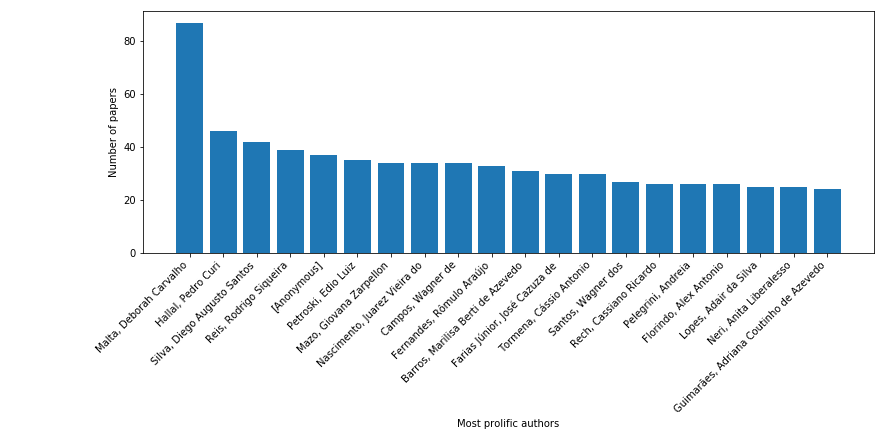

In [12]:
# Visualize the top 10 authors
%matplotlib notebook
n_authors = 20
top_authors = [author for (author,value) in auth_prod[0:n_authors]]
pubs_total  = [value for (author,value) in auth_prod[0:n_authors]]
authors_pos = [ i for i in range(n_authors)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(authors_pos, pubs_total)
plt.xticks(authors_pos, top_authors)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific authors')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [9]:
country_papers = ingest_data.get_country_papers_count(papers, institutions)

In [10]:
# Top countries
country_ranking = [(country, paper_number) for (country, paper_number) in country_papers.items()]
country_ranking = sorted(country_ranking, key=lambda x:x[1], reverse=True)

<IPython.core.display.Javascript object>


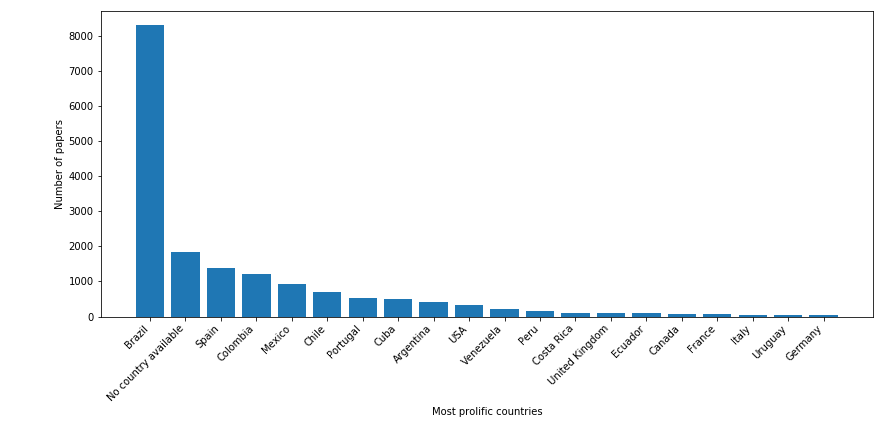

In [11]:
# Visualize the top 20 countries
%matplotlib notebook
n_countries = 20
top_countries = [item[0] for item in country_ranking[0:n_countries]]
pubs_total  =   [item[1]  for item in country_ranking[0:n_countries]]
country_pos = [ i for i in range(n_countries)]

plt.rcParams['figure.figsize'] = [7, 6]
plt.bar(country_pos, pubs_total)
plt.xticks(country_pos, top_countries)
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel('Most prolific countries')
plt.ylabel('Number of papers')
plt.tight_layout()
plt.show()

In [13]:
country_ranking

[('Brazil', 8304),
 ('No country available', 1829),
 ('Spain', 1381),
 ('Colombia', 1220),
 ('Mexico', 919),
 ('Chile', 695),
 ('Portugal', 527),
 ('Cuba', 492),
 ('Argentina', 403),
 ('USA', 319),
 ('Venezuela', 221),
 ('Peru', 150),
 ('Costa Rica', 95),
 ('United Kingdom', 91),
 ('Ecuador', 86),
 ('Canada', 74),
 ('France', 68),
 ('Italy', 54),
 ('Uruguay', 50),
 ('Germany', 37),
 ('Australia', 34),
 ('Paraguay', 33),
 ('Iran', 26),
 ('Bolivia', 24),
 ('Turkey', 21),
 ('China', 21),
 ('Sweden', 17),
 ('India', 15),
 ('Serbia', 14),
 ('Belgium', 12),
 ('Switzerland', 11),
 ('Denmark', 10),
 ('Honduras', 9),
 ('Poland', 9),
 ('Greece', 8),
 ('Netherlands', 8),
 ('Japan', 8),
 ('Austria', 7),
 ('Croatia', 7),
 ('Norway', 7),
 ('Finland', 6),
 ('Russia', 6),
 ('Mozambique', 6),
 ('Macedonia', 6),
 ('Jamaica', 6),
 ('Guatemala', 6),
 ('Lithuania', 5),
 ('Nicaragua', 4),
 ('Nigeria', 4),
 ('South Africa', 3),
 ('Puerto Rico', 3),
 ('Angola', 3),
 ('Vietnam', 3),
 ('Slovenia', 3),
 ('Sri La

In [ ]:
# Upcoming code improvements 
# * Log file
# * Disambiguation 
# * Improved institution name 
# * Co-authorship graph
# * Library structure (pip install kind of functionality)